<h2>Does faster mean Safer? An Investigation of Motorcycle Accidents</h2>
Andrew Davenport

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h4>Introduction:</h4>

I have always been a fan of bikes. Since 8th grade when my Uncle took me mountain biking for the first time, I have been in love. As I've gotten older I have always thought about getting a motorcycle. I mean, I like bikes, a motorcycle is just a motored powered bike.

A couple of my friends ride motorcycles. A common consensus about speed and safety is reached amungst them, "Cars are big metal boxes like tanks. Motorcycles that are quicker and nimble lets you avoid the big metal boxes better." 

I want to look into this claim more. As the years progress, motorcycles get quicker and nimbler, veteran riders get better, and new riders join the sport. I want to investigate trends in motorcyclist deaths, injuries, and how common crashes are.

<h4>Loading the Data:</h4>

In [131]:
data = pd.read_excel("Motorcycle Data.xlsx", header=None)
data2 = pd.read_excel("Motorcycle Data Millions.xlsx", header=None)

data = data.transpose()
data2 = data2.transpose()
data.head()

,0,1,2,3,4
0,Year,Fatalities,Injured persons,Motorcycles involved in crashes,Vehicle-miles (millions)
1,1975,3189,N,N,5629
2,1980,5144,N,N,10214
3,1985,4564,N,N,9086
4,1990,3244,84635,104777,9557


This data begins with the year 1975. Data is taken over 5 year periods to start with. Once 1990 began, data was taken yearly until 2021. The data includes Fatality count, Injured Persons count, Motorcycles involved is crashes count. The data also includes vehicle miles in the millions, and rates per 100 million vehicle miles for fatalities, injured persons, and motorcycles involved in crashes. I took the liberty of seperating the data into seperate datasets due to python's handling of excel. I will combine these datasets once the data is cleaner. Lets start by cleaning up our data and making it a bit more attractive.

<h4>Organizing the Data:</h4>

In [132]:
data.columns = data.iloc[0]
data = data.iloc[1:]
data = data.reset_index(drop=True)
data.head()

,Year,Fatalities,Injured persons,Motorcycles involved in crashes,Vehicle-miles (millions)
0,1975,3189,N,N,5629
1,1980,5144,N,N,10214
2,1985,4564,N,N,9086
3,1990,3244,84635,104777,9557
4,1991,2806,80909,106022,9178


In [133]:
data2.columns = data2.iloc[0]
data2 = data2.iloc[1:]
data2 = data2.reset_index(drop=True)
rename_dictionary = {"Fatalities" : "Fatalities per million vehicle miles", 
                     "Injured persons" : "Injured persons per million vehicle miles", 
                     "Motorcycles involved in crashes" : "Motorcycles involved in chrashes per million vehicle miles"}
data2 = data2.rename(columns=rename_dictionary)

I showed outputs of the first dataset only, however the same operations were carried out on the second data set. The second dataset had similar names to the first dataset. As seen, the column names were renamed for less confusion. Now that our seperate data is cleaned up and prettier, lets combine them and find any charcters and make them NaN.

In [134]:
motorcycle_data = pd.concat([data, data2], axis=1)
motorcycle_data = motorcycle_data.apply(pd.to_numeric, errors='coerce')
motorcycle_data.head()

,Year,Fatalities,Injured persons,Motorcycles involved in crashes,Vehicle-miles (millions),Fatalities per million vehicle miles,Injured persons per million vehicle miles,Motorcycles involved in chrashes per million vehicle miles
0,1975,3189,NaN,NaN,5629,56.65,NaN,NaN
1,1980,5144,NaN,NaN,10214,50.36,NaN,NaN
2,1985,4564,NaN,NaN,9086,50.23,NaN,NaN
3,1990,3244,84635.0,104777.0,9557,33.94,886.0,1096.0
4,1991,2806,80909.0,106022.0,9178,30.57,882.0,1155.0


<h4>Investigation:</h4>
The first thing that creates a challenge in investigating this data is the difference in years. From 1975 to 1990, data is taken in 5-year intervals. The rest of the data (1990-2021) is taken on a yearly interval. To handle this, I am going to investigate just the data from 1975 to 1990 on its own. Although this is excluding data that could be inferential, it would not be accurate to expand the data into year long periods with arithmatic since that is not the true data. Another reason for this is the missing data aspect. This year range is home to most missing datapoints which could skew results later. To handle this, I am going to remove the years prior to 1990, and create a new df of data from 1975 to 1990. Data from 1990 will be included in both.

In [135]:
motorcycle_data_75to90 = motorcycle_data[motorcycle_data['Year'] <= 1990]
motorcycle_data_clean = motorcycle_data[motorcycle_data['Year'] >= 1990]
motorcycle_data_75to90

,Year,Fatalities,Injured persons,Motorcycles involved in crashes,Vehicle-miles (millions),Fatalities per million vehicle miles,Injured persons per million vehicle miles,Motorcycles involved in chrashes per million vehicle miles
0,1975,3189,NaN,NaN,5629,56.65,NaN,NaN
1,1980,5144,NaN,NaN,10214,50.36,NaN,NaN
2,1985,4564,NaN,NaN,9086,50.23,NaN,NaN
3,1990,3244,84635.0,104777.0,9557,33.94,886.0,1096.0


Since the data is incomplete, we will just view a plot of Fatalities, Vehicle-miles(millions), and Fatalities per million vehicle miles. We will later compare this plot against the rest if it is deemed useful. For now, we'll view the plot before the data is left to obscurity. 

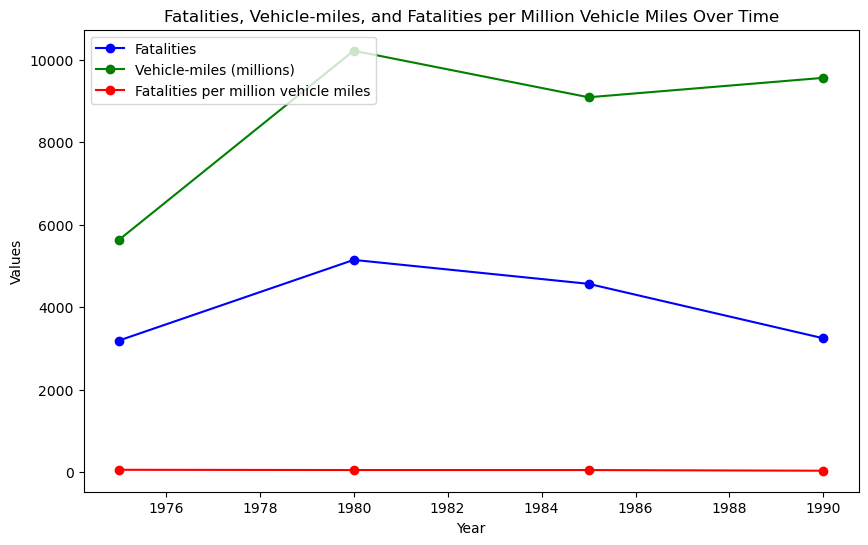

In [142]:
fig, ax = plt.subplots(figsize=(10, 6))
motorcycle_data_75to90.plot(x='Year', y='Fatalities', ax=ax, color='blue', marker='o', label='Fatalities')
motorcycle_data_75to90.plot(x='Year', y='Vehicle-miles (millions)', ax=ax, color='green', marker='o', label='Vehicle-miles (millions)')
motorcycle_data_75to90.plot(x='Year', y='Fatalities per million vehicle miles', ax=ax, color='red', marker='o', label='Fatalities per million vehicle miles')
ax.set_title('Fatalities, Vehicle-miles, and Fatalities per Million Vehicle Miles Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.legend()

We can see a rise in vehicle-miles from 1975 to 1980. It stays relatively constant through the rest of the interval. We also see a rise in fatalities with the rise in vehicle miles. Fatalities slowly drop rather than staying constant. Although the red plotted line looks flat, it actually is not, the values are too small to see the difference. We can see that the relationship between fatalities and vehicle-miles drops from the dataframe above. I will go more into detail when we look at the larger dataset I set aside earlier. 

Lets start our investigation with looking at maximums and minumums of the larger dataset. This should hopefully give some insight to the trends of the data. If the max fatality count is in an earlier year, there is a good chance that bikes are getting safer. Although looking at the maxes and mins is not enough, as we need to investigate fatalities against miles driven. A max in fatality could occur when a max in miles driven also occurs. This could point to a higher number of fatalities purely because of the sheer miles driven. Lets investigate!

In [154]:
max_fatality_index = motorcycle_data_clean['Fatalities'].idxmax()
max_fatality_year = motorcycle_data_clean.loc[max_fatality_index, "Year"]

max_injured_index = motorcycle_data_clean['Injured persons'].idxmax()
max_injured_year = motorcycle_data_clean.loc[max_injured_index, "Year"]

max_involved_crashes_index = motorcycle_data_clean['Motorcycles involved in crashes'].idxmax()
max_involved_crashes_year = motorcycle_data_clean.loc[max_involved_crashes_index, 'Year']

max_vehicle_miles_index = motorcycle_data_clean['Vehicle-miles (millions)'].idxmax()
max_vehicle_miles_year = motorcycle_data_clean.loc[max_vehicle_miles_index, "Year"]

print(f"Year of maximum fatalities: {max_fatality_year}\nYear of maximum injured persons: {max_injured_year}")
print(f"Year of maximum motorcycles involved in crashes: {max_involved_crashes_year}\nYear of maximum vehicle miles (millions): {max_vehicle_miles_year}")

Year of maximum fatalities: 2021
Year of maximum injured persons: 2016
Year of maximum motorcycles involved in crashes: 2016
Year of maximum vehicle miles (millions): 2007


It is very interesting how motorcycles involved in crashes and injured persons achieved the maximum in the same year. As I said, this could be a trivial coincidence, but I am willing to bet this small coincidence will prove to be inferential later. All but vehicle miles achieved a max in the latter couple years. This leads me to believe that bikes are getting dangerous rather than safe. Lets look at the minimums, and see if they occur in the earlier recorded years. 

In [155]:
min_fatality_index = motorcycle_data_clean['Fatalities'].idxmin()
min_fatality_year = motorcycle_data_clean.loc[min_fatality_index, "Year"]

min_injured_index = motorcycle_data_clean['Injured persons'].idxmin()
min_injured_year = motorcycle_data_clean.loc[min_injured_index, "Year"]

min_involved_crashes_index = motorcycle_data_clean['Motorcycles involved in crashes'].idxmin()
min_involved_crashes_year = motorcycle_data_clean.loc[min_involved_crashes_index, 'Year']

min_vehicle_miles_index = motorcycle_data_clean['Vehicle-miles (millions)'].idxmin()
min_vehicle_miles_year = motorcycle_data_clean.loc[min_vehicle_miles_index, "Year"]

print(f"Year of minimum fatalities: {min_fatality_year}\nYear of minimum injured persons: {min_injured_year}")
print(f"Year of minimum motorcycles involved in crashes: {min_involved_crashes_year}\nYear of minimum vehicle miles (millions): {min_vehicle_miles_year}")

Year of minimum fatalities: 1997
Year of minimum injured persons: 1998
Year of minimum motorcycles involved in crashes: 1998
Year of minimum vehicle miles (millions): 1991


As I predicted the minimum values are achieved in the early years. This leads me to believe that bikes are actually getting more dangerous contrary to what my friends believe. Although, these could lead to an informed investigation lets dig a little bit deeper. Lets look at the relationships of these values when a function of miles driven. 

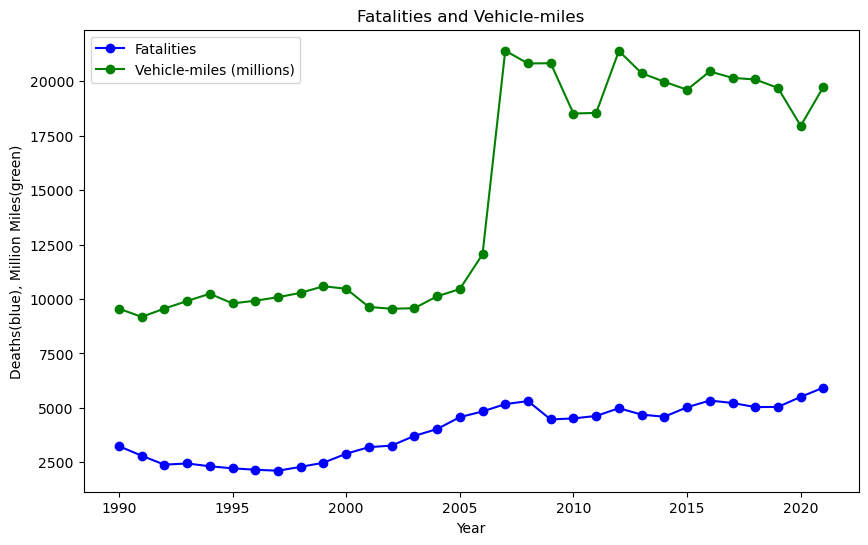

In [157]:
fig, ax = plt.subplots(figsize=(10, 6))
motorcycle_data_clean.plot(x='Year', y='Fatalities', ax=ax, color='blue', marker='o', label='Fatalities')
motorcycle_data_clean.plot(x='Year', y='Vehicle-miles (millions)', ax=ax, color='green', marker='o', label='Vehicle-miles (millions)')
ax.set_title('Fatalities and Vehicle-miles')
ax.set_xlabel('Year')
ax.set_ylabel('Deaths(blue), Million Miles(green)')
ax.legend()

From the graph we can see a huge rise in vehicle-miles driven somewhere in between 2005 and 2010. This goes a long with the max value of miles driven being achieved in 2007. We do see a similar rise in fatalities however not the same level of increase as miles driven. Lets plot these two graphs as a function of one another and see what we can see.

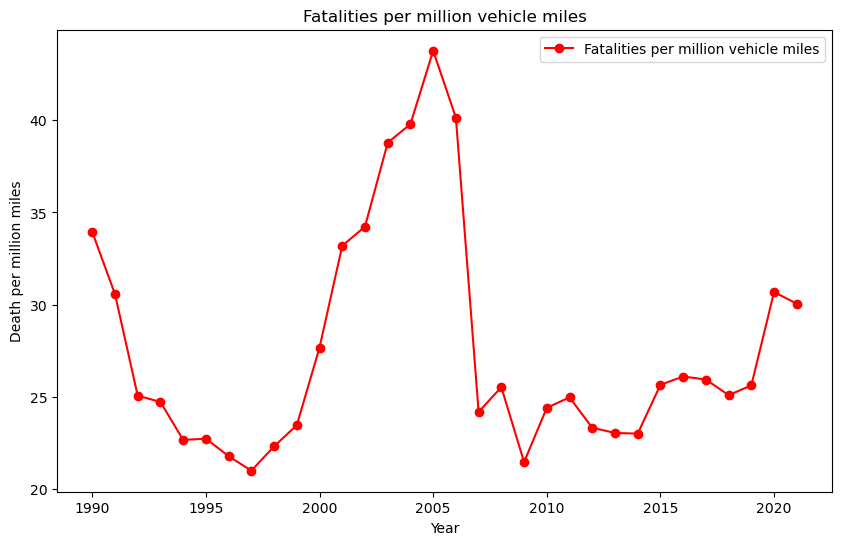

In [158]:
fig, ax = plt.subplots(figsize=(10, 6))
motorcycle_data_clean.plot(x='Year', y='Fatalities per million vehicle miles', ax=ax, color='red', marker='o', label='Fatalities per million vehicle miles')
ax.set_title('Fatalities per million vehicle miles')
ax.set_xlabel('Year')
ax.set_ylabel('Death per million miles')
ax.legend()


Although interesting, this does not align with any possible hypothesis. It is interesting that the rate dropped, rose, dropped, and rose one more time to about that of the original starting point of the graph. This seems to mean that there is some sort of other factor. Lets look into finding the outside factor through the number of accidents per million miles driven as well as injured persons per million miles diven. If there are a lot of crashes, but less injured persons, than crashes are becoming more fatal with technological advancements. 

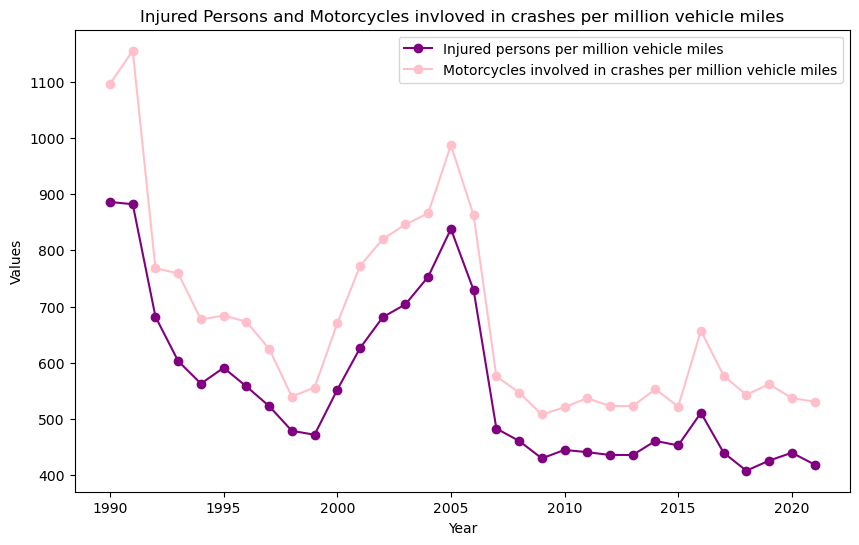

In [161]:
fig, ax = plt.subplots(figsize=(10, 6))
motorcycle_data_clean.plot(x='Year', y='Injured persons per million vehicle miles', ax=ax, color='purple', marker='o', label='Injured persons per million vehicle miles')
motorcycle_data_clean.plot(x='Year', y='Motorcycles involved in chrashes per million vehicle miles', ax=ax, color='pink', marker='o', label='Motorcycles involved in crashes per million vehicle miles')
ax.set_title('Injured Persons and Motorcycles invloved in crashes per million vehicle miles')
ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.legend()

We can see from the graph a similar spike in the data. This leads me to believe that there is some kind of outside factor beyond the scope of my investigation. I would guess likely rider safety regulation changes. 

The interesting thing we can gather from the plot is the overall decline in both crashes and injured persons. This means that crashes are becoming more fatal. We can see that there was way more crashes and injured persons in the early years. However in the graph of fatalities per million miles driven the plot rises back to that of the early years. Since crashes and injured persons have nearly halved, we can say there are less overall crashes, however, crashes are quickly becoming more deadly. 

<h4>Conclusion</h4>
Through the investigation of the dataset(s) we can safly conclude there are less crashes, however the crashes happening are deadlier. I computed the maximums and minimums, really they provided a little bit of insight. They provided that there could be a relationship between crashes and persons injured, but not necessarily fatalities. From these maxes and mins we can conclude that there are more people riding motorcycles as of recent, however we found that this does not mean motorcycles are getting more or less dangerous.

From the final couple of plots it is clear that fatalities are on the rise, hwoever crashes, and persons injured are lowering. This does not conclude wether bikes are getting safer or more and more dangerous. It does tell us that crashes are avoided easier with new technology, however, when crashes occur, they are more likely to be fatal than they previously had been.

Overall, I think there is some truth to what my friends say. Bikes get safer as technology advances. It is clear that the faster, more mobile, newer bikes are leading to less crashes, however crashes are becoming  more and more fatal. There us a saying out there that gos something like, "There are two types of bike riders, ones who have crashed, and those who are going to crash". It is hard to decide wether a higher crash rate but lower fatality rate is preferable, or vice versa, but it is very clear that there are trends in the data to point to the conclusions that have been made. 

In conclusion I believe that the bikes may not be getting safer, but riders feel safer when they have a newer bikes with newer capabilities. 

Side Comment:
For anybody that rides and is reading this, it is very clear bikes are becoming more fatal. Ride with a helemt, ride with your leather, and ride with a buddy. Most importantly keep two wheels down and enjoy that feeling of freedom on the open road :) 